## Logistic Regression
Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater
than 50%, then the model predicts that the instance belongs to that class (called the
positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”).

#### Estimating Probabilities
Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features(plus a bias term), but instead of outputting the result directly , it outputs the 'logistic' of the result.


<i>Logistic Regression model estimated probability (vectorized form):</i>

$\hat{p} = h_{\theta}(x) = \sigma(X^T\theta)$

<i>Logistic Function</i>: 

$\sigma(t) = \frac{1}{1 + exp{(-t)}}$

### Training and Cost Function
The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances $(y = 1)$ and low probabilities for negative instances $(y = 0

<i>Logistic Regression Cost Function</i>
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m \left[ y^{(i)}log(\hat{p}^{i}) + (1-y)^{(i)}log(1-\hat{p}^{(i)}) \right]$$

In [6]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

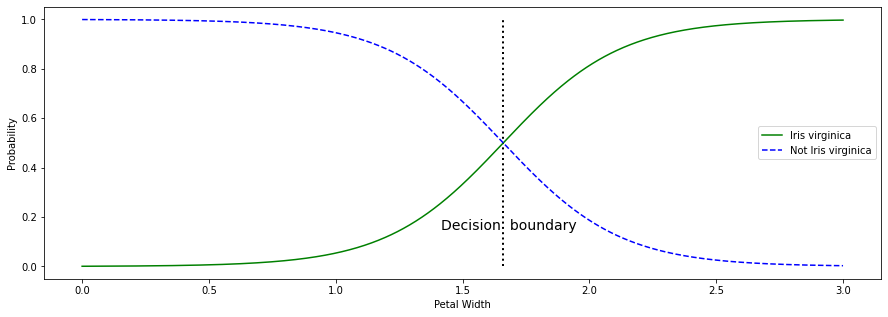

In [18]:
# choose petal length
X = iris['data'][:, 3:]
# 1 if Iris virginica, else 0
y = (iris["target"] == 2).astype(np.int) 

#train model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Data fro prediction
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
_ = ax.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
_ = ax.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
_ = ax.set(xlabel='Petal Width', ylabel='Probability')
_ = ax.legend()
_ = ax.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")

In [14]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])